# Imports

In [58]:

import pandas as pd
import kagglehub
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from langdetect import detect



# Download the Yelp Review Data from Kaggle


In [59]:
# Load the Yelp Review Dataset from Kaggle
path = kagglehub.dataset_download("omkarsabnis/yelp-reviews-dataset")

print("The path to the downloaded data is the following:", path)

The path to the downloaded data is the following: /Users/sandragedig/.cache/kagglehub/datasets/omkarsabnis/yelp-reviews-dataset/versions/1


In [60]:
# List all files in the directory
directory_path = '/Users/sandragedig/.cache/kagglehub/datasets/omkarsabnis/yelp-reviews-dataset/versions/1'
files = os.listdir(directory_path)
files

['yelp.csv']

In [61]:
# Define the file path for loading the data
file_path = '/Users/sandragedig/.cache/kagglehub/datasets/omkarsabnis/yelp-reviews-dataset/versions/1/yelp.csv'

# Load the dataset
review_df = pd.read_csv(file_path, header=None)

# EDA and Data Preparation

In [62]:
# Take a look how many columns are contained in the df
review_df.shape[0]

10001

In [63]:
# Take a look at the df and see, what needs to be done for data preprocessing
review_df.head()

,0,1,2,3,4,5,6,7,8,9
0,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
1,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
2,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
3,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
4,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0


In [64]:
# Display the column names of the review_df
print(review_df.columns)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


## Checking, renaming the necessary columns; dropping the unnecessary ones

In [65]:
# Drop unnecessary columns
columns_to_drop = [0, 1, 2, 5, 6, 7, 8, 9]
review_df = review_df.drop(review_df.columns[columns_to_drop], axis=1)

review_df.head()

,3,4
0,stars,text
1,5,My wife took me here on my birthday for breakf...
2,5,I have no idea why some people give bad review...
3,4,love the gyro plate. Rice is so good and I als...
4,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."


In [66]:
# Check the columns in the DataFrame
print(review_df.columns)

Index([3, 4], dtype='int64')


In [67]:
# Rename columns 3 and 4 to "stars" and "review"
review_df.rename(columns={review_df.columns[0]: 'stars', review_df.columns[1]: 'review'}, inplace=True)

# Check the updated DataFrame
print(review_df.head())


   stars                                             review
0  stars                                               text
1      5  My wife took me here on my birthday for breakf...
2      5  I have no idea why some people give bad review...
3      4  love the gyro plate. Rice is so good and I als...
4      5  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...


In [68]:
# Drop the first row (index 0)
review_df.drop(index=0, inplace=True)

# Reset the index to keep it sequential
review_df.reset_index(drop=True, inplace=True)

# Check the updated DataFrame
print(review_df.head())

  stars                                             review
0     5  My wife took me here on my birthday for breakf...
1     5  I have no idea why some people give bad review...
2     4  love the gyro plate. Rice is so good and I als...
3     5  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4     5  General Manager Scott Petello is a good egg!!!...


## Checking and transforming the datatypes

In [69]:
review_df.dtypes

stars     object
review    object
dtype: object

In [70]:
# Convert 'stars' column to int64
review_df['stars'] = review_df['stars'].astype('int64')

# Convert 'review' column to string type (str)
review_df['review'] = review_df['review'].astype('string')

# Check the data types of the columns
print(review_df.dtypes)

stars              int64
review    string[python]
dtype: object


In [71]:
# Überprüfen auf NaN-Werte und leere Strings in der 'review'-Spalte
empty_reviews = review_df[review_df['review'].isna() | (review_df['review'].str.strip() == '')]

# Zeige alle Zeilen mit leeren oder NaN-Werten in der 'review'-Spalte
print("Rows with empty or NaN values in 'review' column:")
print(empty_reviews)

Rows with empty or NaN values in 'review' column:
Empty DataFrame
Columns: [stars, review]
Index: []


## Dealing with the three sentiment categories

In [72]:
# Dividing the ratings into three categories (positive =1, neutral = 0, negative=2) for sentiment analysis, 
# as it is designed to detect these three emotions.
# Create a new column 'polarity' based on 'stars'
review_df['polarity'] = review_df['stars'].apply(lambda x: 1 if x >= 4 else (0 if x == 3 else 2))

review_df.head()

,stars,review,polarity
0,5,My wife took me here on my birthday for breakf...,1
1,5,I have no idea why some people give bad review...,1
2,4,love the gyro plate. Rice is so good and I als...,1
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1
4,5,General Manager Scott Petello is a good egg!!!...,1


In [73]:
review_df['polarity'].unique()

array([1, 2, 0])

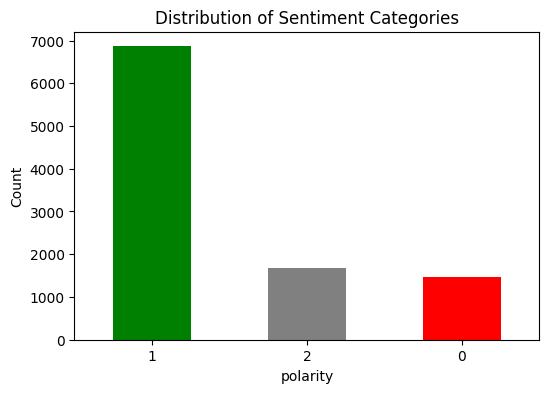

In [74]:
# Plot the distribution of sentiment categories
plt.figure(figsize=(6,4))
review_df['polarity'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])

# Adding labels and title
plt.title('Distribution of Sentiment Categories')
plt.xlabel('polarity')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Display the plot
plt.show()

## Dealing with the different languages in the review-column

In [75]:
# Check if all the reviews are in english
review_df['detected_language']=review_df['review'].apply(lambda x: detect(str(x)))
print(review_df["detected_language"].value_counts())

# Calculate the percentage of the reviews, that are not in english
percentage_non_english = review_df["detected_language"].ne("en").mean() * 100
print(f"Percentage of non-English reviews: {percentage_non_english:.2f}%")

detected_language
en    9962
af       6
so       4
it       3
sv       3
ca       3
nl       3
no       2
id       2
es       2
fr       2
tl       2
cy       2
sl       1
da       1
pt       1
tr       1
Name: count, dtype: int64
Percentage of non-English reviews: 0.38%


In [76]:
# Filter the rows where detected_language is not 'en'
non_english_reviews = review_df[review_df['detected_language'] != 'en']

# Display the result
non_english_reviews

,stars,review,polarity,detected_language
139,4,Very polite staff. Did not wait very long to b...,1,af
217,5,Love Krista!,1,sl
679,5,Excellent burger,1,nl
1075,5,Nic-nacs galore!,1,ca
1136,5,Best donuts I have ever had.,1,no
1290,2,No good,2,so
1486,4,"Daaaaaaaaaaaaaaaaaaaaaang, their AC feels good...",1,so
1496,5,Yum best donuts in Phoenix.,1,nl
2016,5,Amazing. Romantic!,1,it
2402,4,Chambord margaritas are killer!,1,sv


So as we can see, even the reviews, where the detected language is not english, the reviews are in english. So we don't have to translate or delete them to avoid problems with the sentiment classification later on.

In [77]:
review_df = review_df.drop(['detected_language', 'stars'], axis=1)
review_df.head()

,review,polarity
0,My wife took me here on my birthday for breakf...,1
1,I have no idea why some people give bad review...,1
2,love the gyro plate. Rice is so good and I als...,1
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1
4,General Manager Scott Petello is a good egg!!!...,1


## Dataset Splitting

In [78]:
# Split the DataFrame into training (80%), validation (10%), and test (10%) sets
train_df, temp_df = train_test_split(review_df, test_size=0.2, random_state=42, stratify=review_df['polarity'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['polarity'])

# Check the lengths of the datasets
print("Train Set Length:", len(train_df))
print("Validation Set Length:", len(val_df))
print("Test Set Length:", len(test_df))

# safe the datasets 
train_df.to_csv('train_data.csv', index=False)
val_df.to_csv('val_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

Train Set Length: 8000
Validation Set Length: 1000
Test Set Length: 1000
